In [1]:
import json
import datetime

In [2]:
import pandas

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

In [4]:
data = [json.loads(s) for s in open("cfjs2017_2017-09-23.json").read().split("\n") if s]
data += [json.loads(s) for s in open("cfjs2017_2017-09-24.json").read().split("\n") if s]

In [5]:
def path_get(obj, *args):
    if obj and args:
        return path_get(obj.get(args[0]), *args[1:])
    if obj or isinstance(obj, (int, float)):
        return obj
    return None

In [6]:
ifaces = ["wwan0"] + ["wlan%d" % s for s in range(8)]
cols = '''ipkts
ierrs
opkts
oerrs
colls
in_octets
out_octets
in_drops
out_discards
in_unknown_protos'''.split()

absolutes = []
counters = []
for n in range(1,11):
    dev = "dev%02d" % n
    absolutes += [(dev, "dialup_device", "signal_quality")]
    for iface in ifaces:
        for field in cols:
            counters += [(dev, "interface", iface, field)]
    for d in range(1, 14):
        absolutes += [(dev, "wlan_ap_scan_force", str(d))]
    for hz in ("2g", "5g"):
        for ssid in "cfjs2017 cfjs2017_5g cfjs_lan".split():
            absolutes += [(dev, "wlan_client_count", hz, ssid)]


In [7]:
amat = [[path_get(row, *p) for p in absolutes] for row in data]
cmat = [[path_get(row, *p) for p in counters] for row in data]

In [8]:
lcol = len(cols)
ldev = len(cols)*9
wlan_io = [k+ldev*i+lcol*j for i in range(10) for j in range(1,9) for k in (5,6)]
[counters[i] for i in wlan_io]

[('dev01', 'interface', 'wlan0', 'in_octets'),
 ('dev01', 'interface', 'wlan0', 'out_octets'),
 ('dev01', 'interface', 'wlan1', 'in_octets'),
 ('dev01', 'interface', 'wlan1', 'out_octets'),
 ('dev01', 'interface', 'wlan2', 'in_octets'),
 ('dev01', 'interface', 'wlan2', 'out_octets'),
 ('dev01', 'interface', 'wlan3', 'in_octets'),
 ('dev01', 'interface', 'wlan3', 'out_octets'),
 ('dev01', 'interface', 'wlan4', 'in_octets'),
 ('dev01', 'interface', 'wlan4', 'out_octets'),
 ('dev01', 'interface', 'wlan5', 'in_octets'),
 ('dev01', 'interface', 'wlan5', 'out_octets'),
 ('dev01', 'interface', 'wlan6', 'in_octets'),
 ('dev01', 'interface', 'wlan6', 'out_octets'),
 ('dev01', 'interface', 'wlan7', 'in_octets'),
 ('dev01', 'interface', 'wlan7', 'out_octets'),
 ('dev02', 'interface', 'wlan0', 'in_octets'),
 ('dev02', 'interface', 'wlan0', 'out_octets'),
 ('dev02', 'interface', 'wlan1', 'in_octets'),
 ('dev02', 'interface', 'wlan1', 'out_octets'),
 ('dev02', 'interface', 'wlan2', 'in_octets'),
 ('

異常値を除去。

In [9]:
#mat[176][724] = None
#mat[176][726] = None
#mat[176][678] = None
for i in range(len(counters)):
    cmat[120][i] = None
    cmat[124][i] = None
    cmat[177][i] = None
    cmat[287][i] = None
    cmat[329][i] = None
    cmat[387][i] = None
    cmat[409][i] = None
    cmat[463][i] = None
for i in range(550,609):
    cmat[176][i] = None
for i in range(540,609):
    cmat[238][i] = None
for i in range(540,609):
    cmat[239][i] = None
for i in range(540,609):
    cmat[240][i] = None
for i in range(90, 789):
    cmat[462][i] = None
for i in range(90,339):
    cmat[488][i] = None

In [10]:
a = pandas.DataFrame(amat)
c = pandas.DataFrame(cmat)

In [11]:
tm = [datetime.datetime.strptime(row["@timestamp"], "%Y-%m-%dT%H:%M:%S.%f") for row in data]
t = pandas.Series(tm)

# 素朴にプロット

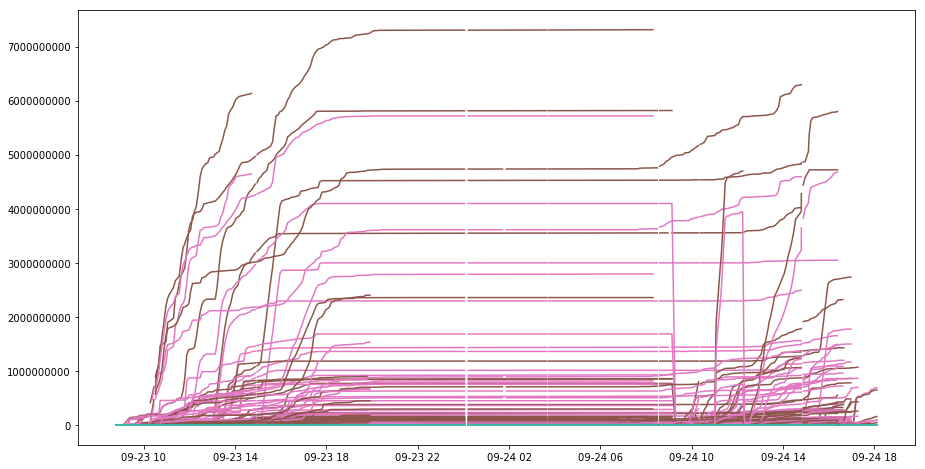

In [12]:
plt.figure(figsize=(15,8))
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
x=plt.plot(t,c)

In [13]:
c2=c.fillna(method="ffill").fillna(0).diff()

In [14]:
for i in range(c2.shape[0]):
    for j in range(c2.shape[1]):
        if c2.iloc[i,j] < 0:
            print(i,j,c2.iloc[i,j])

109 90 -239.0
109 92 -210.0
109 95 -72154.0
109 96 -83902.0
109 98 -1.0
178 540 -4799479.0
178 542 -3641394.0
178 543 -2637.0
178 545 -6079237431.0
178 546 -634842520.0
178 550 -269217.0
178 552 -461293.0
178 555 -51297945.0
178 556 -550300171.0
178 558 -13091.0
178 590 -2813371.0
178 592 -3647929.0
178 595 -501334859.0
178 596 -4641986674.0
178 598 -13355.0
178 600 -612985.0
178 602 -750822.0
178 605 -88386251.0
178 606 -888854074.0
178 608 -8545.0
241 540 -2515461.0
241 542 -2093180.0
241 543 -447.0
241 545 -2378782405.0
241 546 -683006421.0
241 550 -537350.0
241 552 -678602.0
241 555 -182004326.0
241 556 -660569534.0
241 558 -9876.0
241 590 -1383846.0
241 592 -1619606.0
241 595 -447639406.0
241 596 -1506714963.0
241 598 -14177.0
241 600 -223309.0
241 602 -290710.0
241 605 -58949433.0
241 606 -224584514.0
241 608 -11150.0
364 450 -811521.0
364 452 -620352.0
364 455 -879416187.0
364 456 -274964241.0
364 460 -44388.0
364 462 -59029.0
364 465 -15060086.0
364 466 -41246238.0
364 468 -156

# カウンターの調整をしてプロット

counter の wrap-around や、リブートによる counter reset などで数値が巻き戻ることがある。ざっくりといって、負数は 0 にしてしまえばよい。

In [15]:
c2[c2<0] = 0

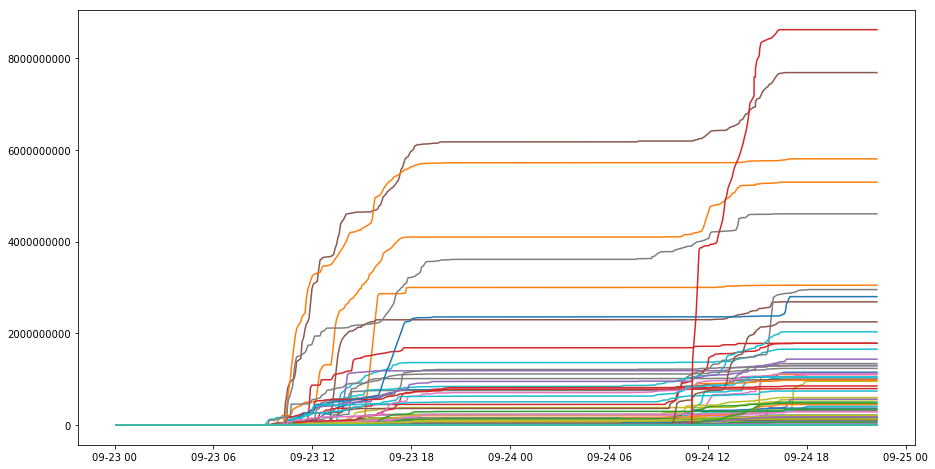

In [16]:
plt.figure(figsize=(15,8))
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
x=plt.plot(t, c2.iloc[:,wlan_io].cumsum())

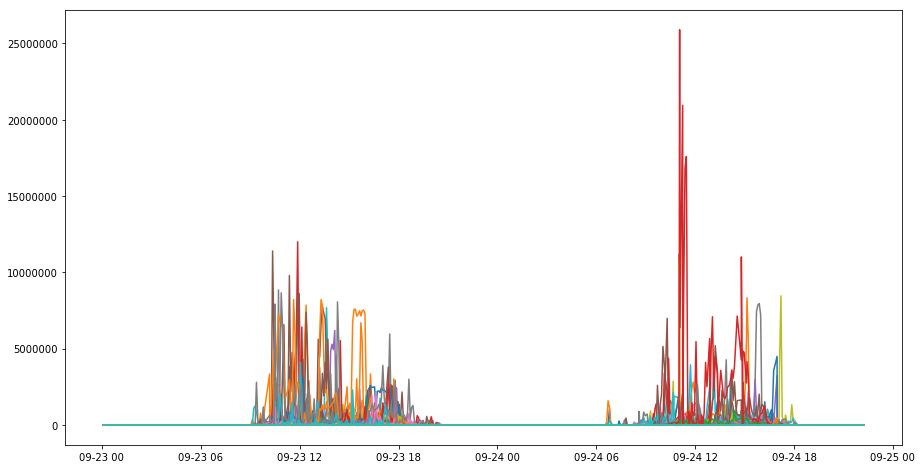

In [17]:
plt.figure(figsize=(15,8))
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
x=plt.plot(t, c2.iloc[:,wlan_io]/300*8)

# デバイスごとに合算（上り下り総和）

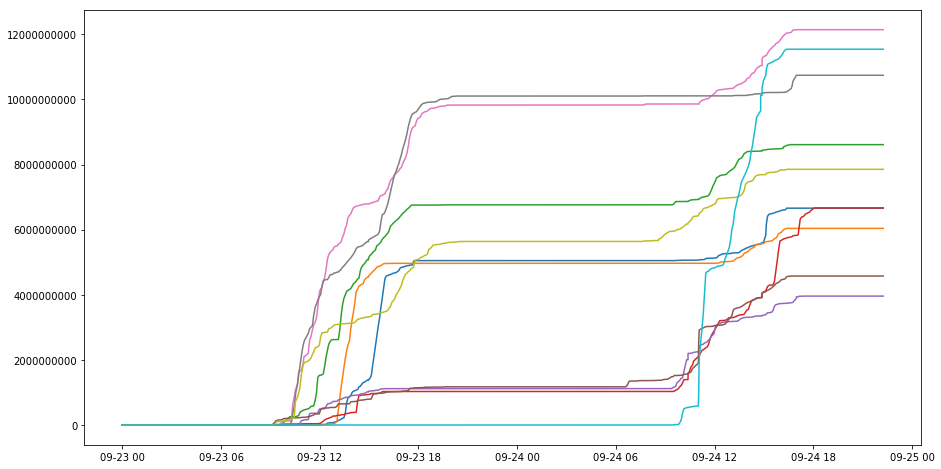

In [18]:
plt.figure(figsize=(15,8))
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
c3 = pandas.DataFrame([c2.iloc[:,wlan_io[16*i:16*(i+1)]].sum(axis=1).cumsum() for i in range(10)])
x = plt.plot(tm, c3.T)

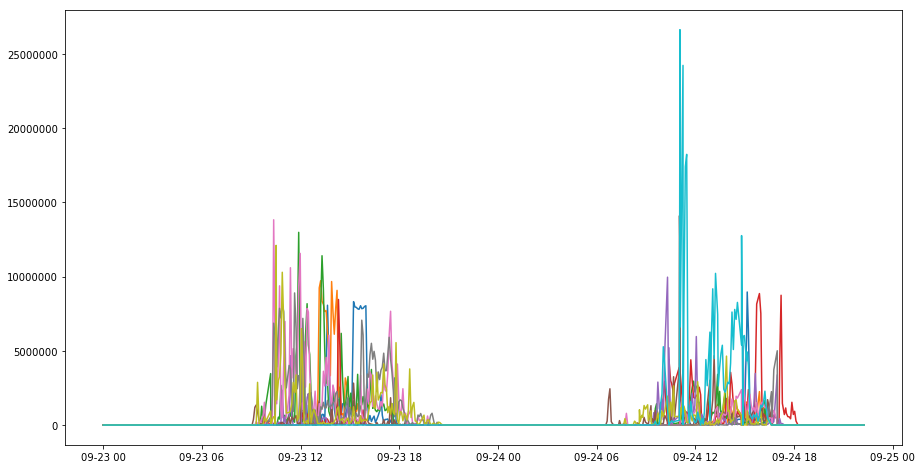

In [19]:
plt.figure(figsize=(15,8))
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
c3 = pandas.DataFrame([c2.iloc[:,wlan_io[16*i:16*(i+1)]].sum(axis=1)/300*8 for i in range(10)])
x = plt.plot(tm, c3.T)

Minecraft ワークショップは 10Mbps 程度見込んでおく感じか。

# 上り下り

普通に下りが支配的。ただ、上りと下りが両方同程度になっている時間帯もあるのが興味深い。

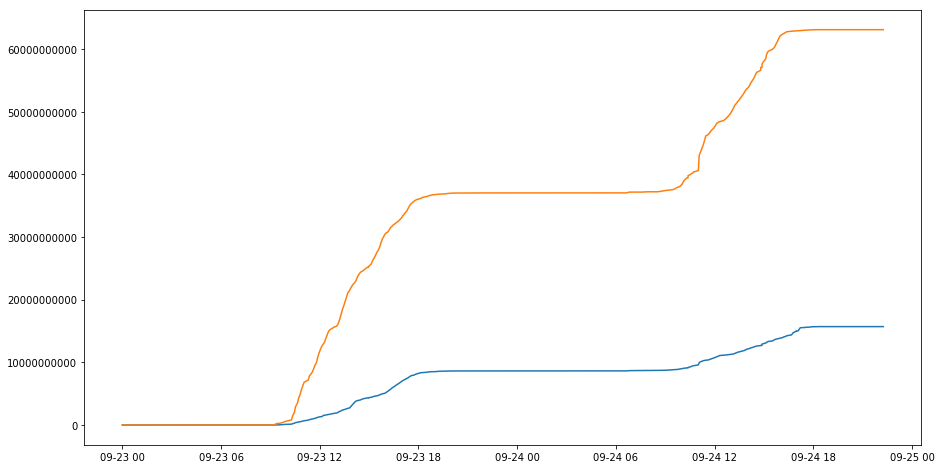

In [20]:
plt.figure(figsize=(15,8))
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
c4 = pandas.concat([c2.iloc[:,wlan_io[0:160:2]].sum(axis=1), c2.iloc[:,wlan_io[1:160:2]].sum(axis=1)], axis=1)
x=plt.plot(tm, c4.cumsum())

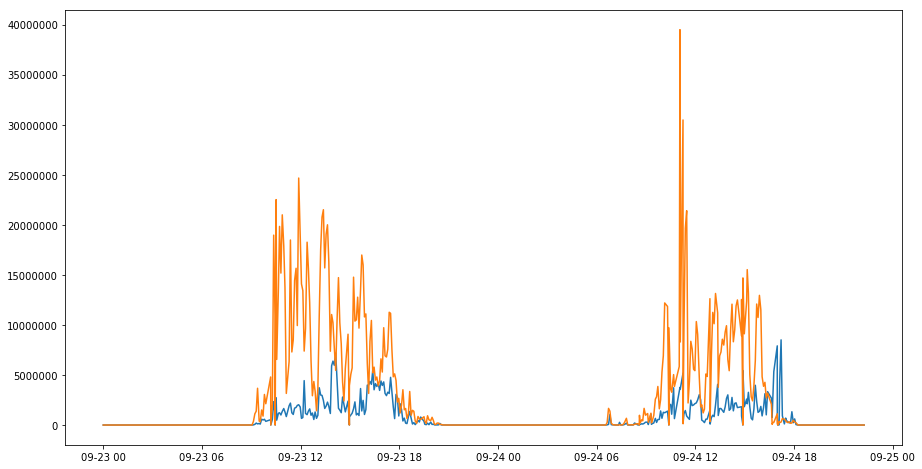

In [21]:
plt.figure(figsize=(15,8))
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
c4 = pandas.concat([c2.iloc[:,wlan_io[0:160:2]].sum(axis=1), c2.iloc[:,wlan_io[1:160:2]].sum(axis=1)], axis=1)
x=plt.plot(tm, c4/300*8)

# 総合計

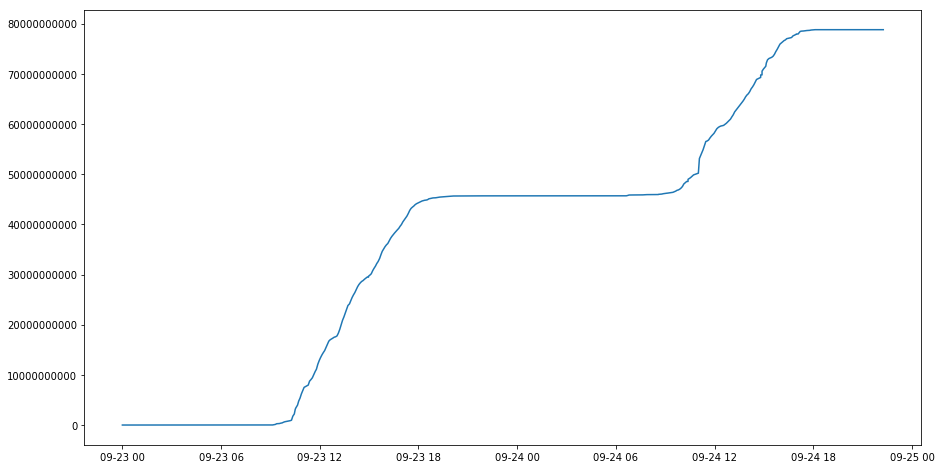

In [22]:
plt.figure(figsize=(15,8))
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
x=plt.plot(t, c2.iloc[:,wlan_io].cumsum().sum(axis=1))

In [23]:
"{:,}".format(list(c2.iloc[:,wlan_io].cumsum().sum(axis=1))[-1])

'78,804,531,762.0'

これに別途数えていない部分で 4.5 G 使用していたので、合計 83 G 程度使ったようだ。やはり 2 日目のほうがおとなしい。

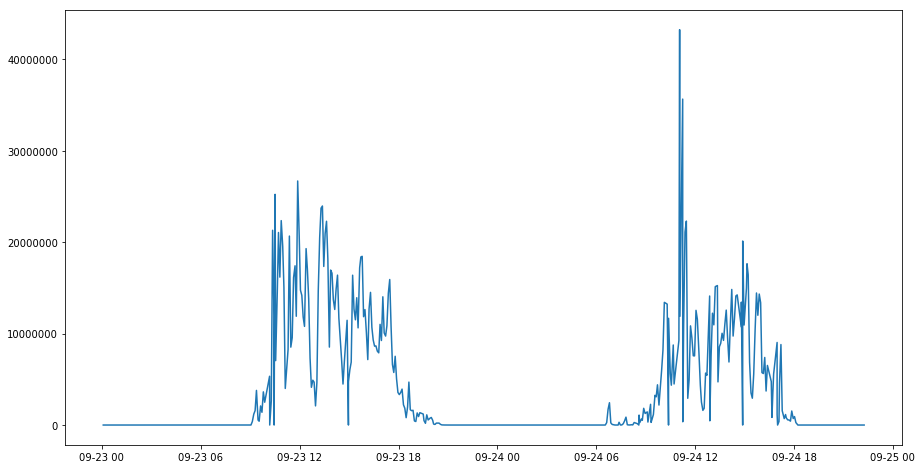

In [24]:
plt.figure(figsize=(15,8))
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
x=plt.plot(t, c2.iloc[:,wlan_io].cumsum().sum(axis=1).diff()/300*8)

ピークで 40Mbps 以上出てるので、ADSL だとダメだったかもね。